## Logic Based FizzBuzz Function [Software 1.0]

In [364]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [365]:
def createInputCSV(start,end,filename):
#Why list in Python?
#Lists are the ideal collection data types that can be used in this case because of the following reasons:
#Lists are ordered like the tuples and the values in it are changeable i.e. we can remove or add values into the list anytime we want, which cannot be done in the tuples.
#Unlike the sets, lists can be indexed. 
#Even-though the dictionaries can also be index, the memory requirement of lists when compared to the dictionaries is less. 

    inputData   = []
    outputData  = []
    # Why do we need training Data?
    # Supervise learning algorithms use the already labeled training examples to learn by itself and be able 
    #to predict the answers for the new inputs that the users give to the algorithm in the future.
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    # Why dataframe?
    # In the data frames, the rows and columns are labeled so that the data can be easily traversed
    #and they are flexible with the size i.e. any number of elements can be appended or deleted from it. 

    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [366]:
def processData(dataset):
    # Why do we have to process?
    # data is processed and converted into the 10bit binary code which can also be said as the normalization 
    #of the data which helps the model learn the data fast and converge better at the end
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [367]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        #Why the number 10?
        # we need 10 bits to write the binary code for the 3 digit numbers

        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [368]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [369]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras import optimizers

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    #Model is basically the data structure that defines the structure of the neural network and how the neural network will be working. 
    #The model is of two types namely the sequential model and the functional model.

    # Why use Dense layer and then activation?
    #Dense layer is basically a fully connected layer like a multi-layer perceptron. Without the activation function,
    #the network can just be written as the linear expression of the inputs even with the weights assigned to them.
    #So, to introduce the non-linearity we use the activation function which also defines how the neurons work.
    
    # Why use sequential model with layers?
    # Sequential API is a simple model composition to create having the stack of layers.
    #we use the sequential composition because there is no intervention in the hidden layers by us in the future 
    #and the implementation is simple when compared with the functional composition of the model.
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    #We use dropout to avoid the overfitting where the model memorizes the training set a 
    #lot and then imposes higher degree polynomials to fit the data resulting in the convolutions and
    #the higher training accuracy and comparatively less testing accuracy. 
    #Dropout forces the model to not memorize how much a node contributes preventing the overfitting.

    model.add(Dropout(drop_out))
    model.add(Dense(300))
    model.add(Activation('sigmoid'))
   
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # as the implementation output is a multiple category value, the softmax activation function results the 
    #probabilities of all the categorical values and the value with the highest probability is considered as the result.
    model.summary()
    # Why use categorical_crossentropy?
    #Here in our implementation, we have one of the four categories as our output. So, we use the categorical_crossentropy 
    #which maximizes the results from the softmax activation function.
    ada= optimizers.adam(lr=0.01)
    model.compile(optimizer= ada,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [370]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [371]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 256)               2816      
_________________________________________________________________
activation_166 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_167 (Dense)            (None, 300)               77100     
_________________________________________________________________
activation_167 (Activation)  (None, 300)               0         
_________________________________________________________________
dense_168 (Dense)            (None, 4)                 1204      
_________________________________________________________________
activation_168 (Activation)  (None, 4)                 0         
Total para

# <font color = blue>Run Model</font>

In [372]:
validation_data_split = 0.2
num_epochs = 150
model_batch_size = 50
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/150
720/720 [==============================] - 1s 1ms/step - loss: 1.2795 - acc: 0.4708 - val_loss: 1.1817 - val_acc: 0.5111
Epoch 2/150
720/720 [==============================] - 0s 80us/step - loss: 1.2451 - acc: 0.4722 - val_loss: 1.2329 - val_acc: 0.5000
Epoch 3/150
720/720 [==============================] - 0s 75us/step - loss: 1.2223 - acc: 0.5250 - val_loss: 1.2137 - val_acc: 0.5333
Epoch 4/150
720/720 [==============================] - 0s 76us/step - loss: 1.1539 - acc: 0.5306 - val_loss: 1.2155 - val_acc: 0.5333
Epoch 5/150
720/720 [==============================] - 0s 85us/step - loss: 1.1581 - acc: 0.4944 - val_loss: 1.1847 - val_acc: 0.4722
Epoch 6/150
720/720 [==============================] - 0s 126us/step - loss: 1.1382 - acc: 0.5278 - val_loss: 1.1891 - val_acc: 0.5333
Epoch 7/150
720/720 [==============================] - 0s 135us/step - loss: 1.1222 - acc: 0.5361 - val_loss: 1.1810 - val_acc: 0.4722
Epoch 8/150
720

720/720 [==============================] - 0s 72us/step - loss: 0.3513 - acc: 0.8681 - val_loss: 0.7181 - val_acc: 0.7333
Epoch 62/150
720/720 [==============================] - 0s 71us/step - loss: 0.3897 - acc: 0.8625 - val_loss: 0.7233 - val_acc: 0.7722
Epoch 63/150
720/720 [==============================] - 0s 74us/step - loss: 0.3200 - acc: 0.8972 - val_loss: 0.6261 - val_acc: 0.8278
Epoch 64/150
720/720 [==============================] - 0s 70us/step - loss: 0.3077 - acc: 0.8931 - val_loss: 0.6552 - val_acc: 0.8000
Epoch 65/150
720/720 [==============================] - 0s 71us/step - loss: 0.2951 - acc: 0.9000 - val_loss: 0.5749 - val_acc: 0.8111
Epoch 66/150
720/720 [==============================] - 0s 71us/step - loss: 0.2769 - acc: 0.9000 - val_loss: 0.6408 - val_acc: 0.8056
Epoch 67/150
720/720 [==============================] - 0s 73us/step - loss: 0.3103 - acc: 0.8819 - val_loss: 0.6059 - val_acc: 0.8444
Epoch 68/150
720/720 [==============================] - 0s 72us/step

720/720 [==============================] - 0s 74us/step - loss: 0.1385 - acc: 0.9486 - val_loss: 0.4140 - val_acc: 0.8944
Epoch 122/150
720/720 [==============================] - 0s 78us/step - loss: 0.1240 - acc: 0.9486 - val_loss: 0.4094 - val_acc: 0.8833
Epoch 123/150
720/720 [==============================] - 0s 79us/step - loss: 0.1261 - acc: 0.9542 - val_loss: 0.3666 - val_acc: 0.8889
Epoch 124/150
720/720 [==============================] - 0s 74us/step - loss: 0.1470 - acc: 0.9444 - val_loss: 0.3400 - val_acc: 0.8889
Epoch 125/150
720/720 [==============================] - 0s 76us/step - loss: 0.1458 - acc: 0.9486 - val_loss: 0.4005 - val_acc: 0.9056
Epoch 126/150
720/720 [==============================] - 0s 71us/step - loss: 0.1621 - acc: 0.9500 - val_loss: 0.4776 - val_acc: 0.8333
Epoch 127/150
720/720 [==============================] - 0s 72us/step - loss: 0.1186 - acc: 0.9625 - val_loss: 0.5116 - val_acc: 0.8444
Epoch 128/150
720/720 [==============================] - 0s 74

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c53bfb978>,
      dtype=object)

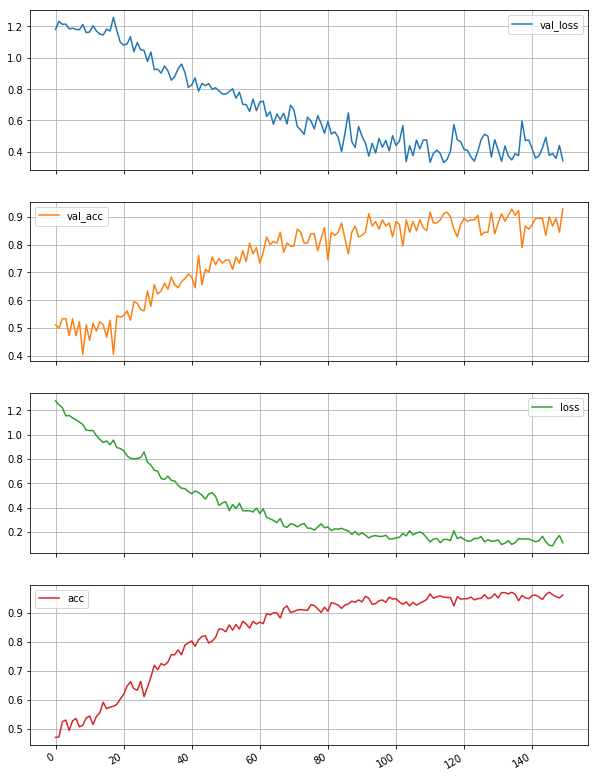

In [373]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [374]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [375]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "saikalya")
testDataLabel.insert(0, "XXXXXXXX")

testDataInput.insert(1, "50292522")
testDataLabel.insert(1, "XXXXXXXX")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 13  Correct :87
Testing Accuracy: 87.0
